In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [2]:
df = pd.read_csv("ceosal.csv")

In [3]:
df

salary  age  college  grad  comten  ceoten  sales  profits  mktval  \
0      1161   49        1     1       9       2   6200      966   23200   
1       600   43        1     1      10      10    283       48    1100   
2       379   51        1     1       9       3    169       40    1100   
3       651   55        1     0      22      22   1100      -54    1000   
4       497   44        1     1       8       6    351       28     387   
..      ...  ...      ...   ...     ...     ...    ...      ...     ...   
172     264   63        1     0      42       3    334       43     480   
173     185   58        1     0      39       1    766       49     560   
174     387   71        1     1      32      13    432       28     477   
175    2220   63        1     1      18      18    277      -80     540   
176     445   69        1     0      23       0    249       31     828   

      lsalary    lsales    lmktval  comtensq  ceotensq   profmarg  
0    7.057037  8.732305  10.051908        81         4  15.580646  
1    6.396930  5.645447   7.003066       100       100  16.961130  
2    5.937536  5.129899   7.003066        81         9  23.668638  
3    6.478509  7.003066   6.907755       484       484  -4.909091  
4    6.208590  5.860786   5.958425        64        36   7.977208  
..        ...       ...        ...       ...       ...        ...  
172  5.575949  5.811141   6.173786      1764         9  12.874251  
173  5.220356  6.641182   6.327937      1521         1   6.396867  
174  5.958425  6.068426   6.167517      1024       169   6.481482  
175  7.705263  5.624018   6.291569       324       324 -28.880867  
176  6.098074  5.517453   6.719013       529         0  12.449800  

[177 rows x 15 columns]

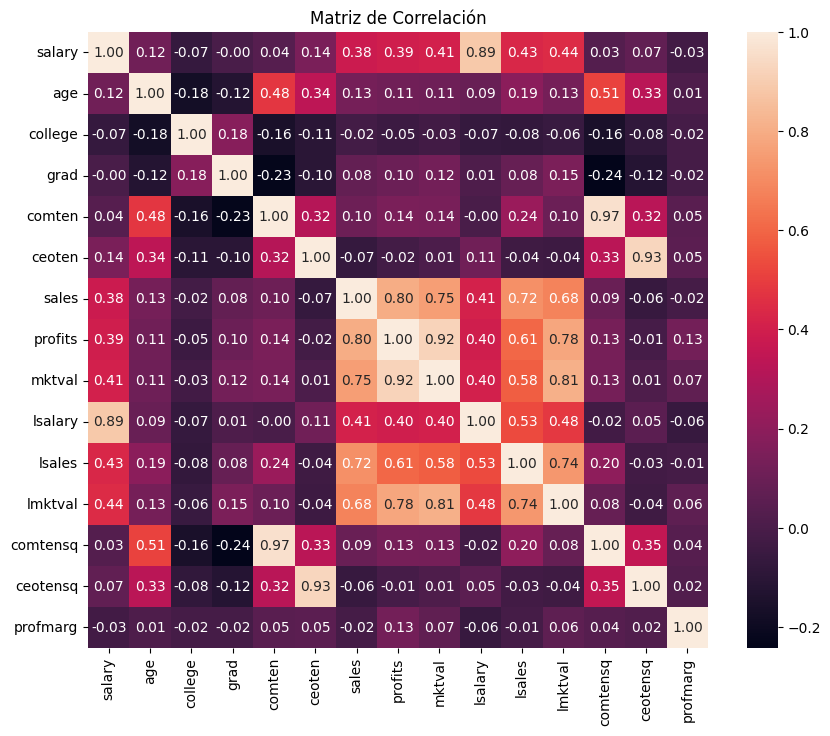

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

Usando solamente la experiencia del ceo

In [5]:
X = df[['ceoten']]
y = df['salary']

In [6]:
X = sm.add_constant(X)

In [7]:
modelo = sm.OLS(y, X)

In [8]:
resultados = modelo.fit()

In [9]:
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.651
Date:                Wed, 29 Jan 2025   Prob (F-statistic):             0.0577
Time:                        23:00:14   Log-Likelihood:                -1377.4
No. Observations:                 177   AIC:                             2759.
Df Residuals:                     175   BIC:                             2765.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        772.4263     65.676     11.761      0.0

1.   No. Observations: 177, el número total de observaciones en el dataset.
2.   Df Residuals (Grados de libertad de los residuales): 175, el número de observaciones menos el número de parámetros en el modelo (177 - 2 = 175).
1.   Df Model (Grados de libertad del modelo): 1, el número de variables independientes (aquí sólo ceoten fue incluida).
2.   R-squared: 0.020, que significa que solo el 2% de la variabilidad de salary es explicada por ceoten, indicando un modelo de ajuste muy bajo
1.   Adj. R-squared: 0.015, una versión ajustada de R² que penaliza el número de predictores, también es bajo, mostrando que ceoten no explica bien salary.
2.   F-statistic: 3.651, la prueba de significancia global del modelo. Aquí, el valor de F es relativamente bajo, indicando que ceoten no tiene un impacto significativo en salary.
1.   Prob (F-statistic): 0.0577, casi significativo al nivel de 0.05, pero sin llegar a serlo, sugiriendo que la relación entre ceoten y salary es débil.
2.   Omnibus: 146.588 y Prob(Omnibus): 0.000, indican que los residuos no siguen una distribución normal.
1.   Jarque-Bera (JB) y Prob(JB): Estas estadísticas (2417.065 y 0.00) también indican una fuerte desviación de normalidad.
2.   Skew (Sesgo): 2.933, indicando que los residuales tienen un sesgo positivo considerable.
1.   Kurtosis: 20.127, muy superior a 3, lo que sugiere que los residuales tienen colas largas (pico alto).
2.   Durbin-Watson: 2.164, que indica que no hay problemas significativos de autocorrelación, pues este valor se aproxima a 2 (sin autocorrelación).










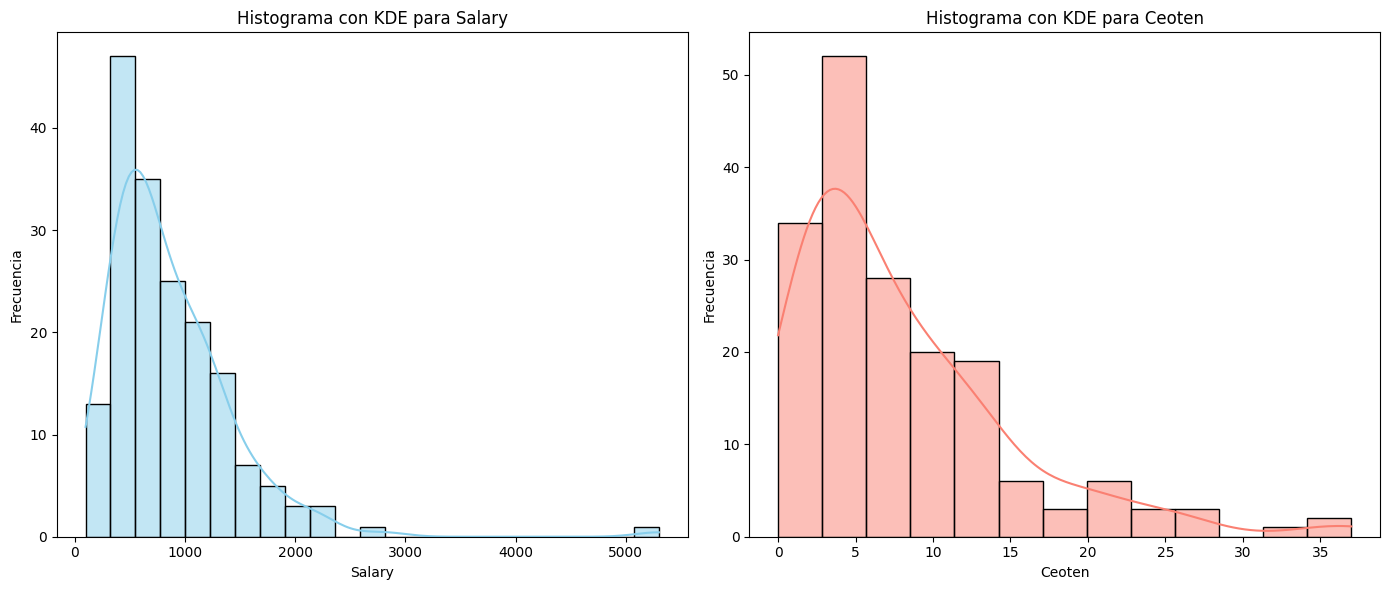

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(data=df, x='salary', kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Histograma con KDE para Salary')
axes[0].set_xlabel('Salary')
axes[0].set_ylabel('Frecuencia')
sns.histplot(data=df, x='ceoten', kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Histograma con KDE para Ceoten')
axes[1].set_xlabel('Ceoten')
axes[1].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

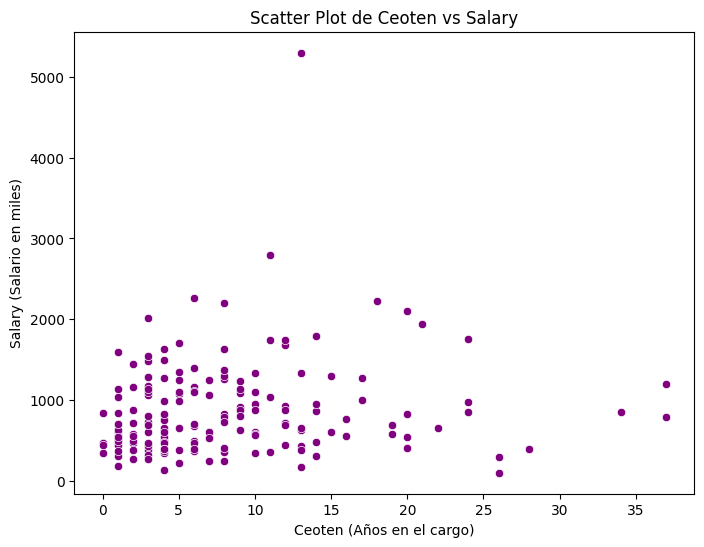

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ceoten', y='salary', color='purple')
plt.title('Scatter Plot de Ceoten vs Salary')
plt.xlabel('Ceoten (Años en el cargo)')
plt.ylabel('Salary (Salario en miles)')
plt.show()

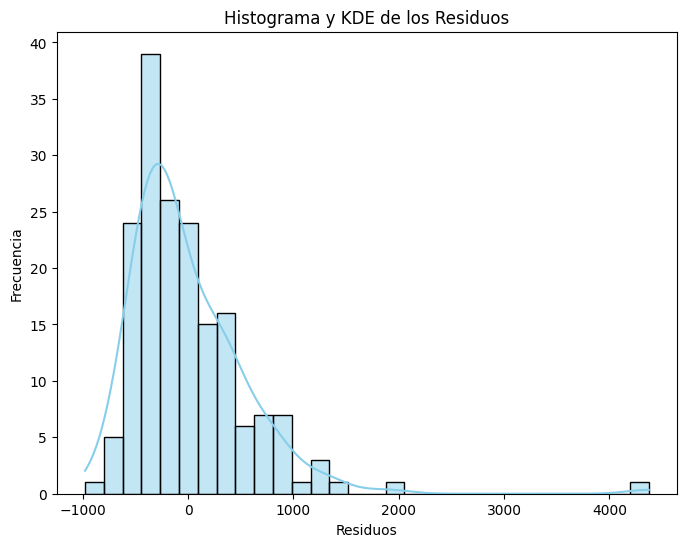

In [13]:
residuos = resultados.resid

plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, color='skyblue', bins=30)
plt.title('Histograma y KDE de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

<Figure size 800x600 with 0 Axes>

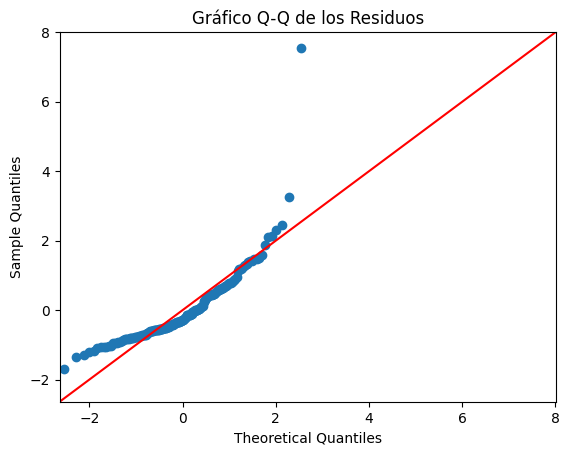

In [14]:
plt.figure(figsize=(8, 6))
sm.qqplot(residuos, line='45', fit=True)
plt.title('Gráfico Q-Q de los Residuos')
plt.show()

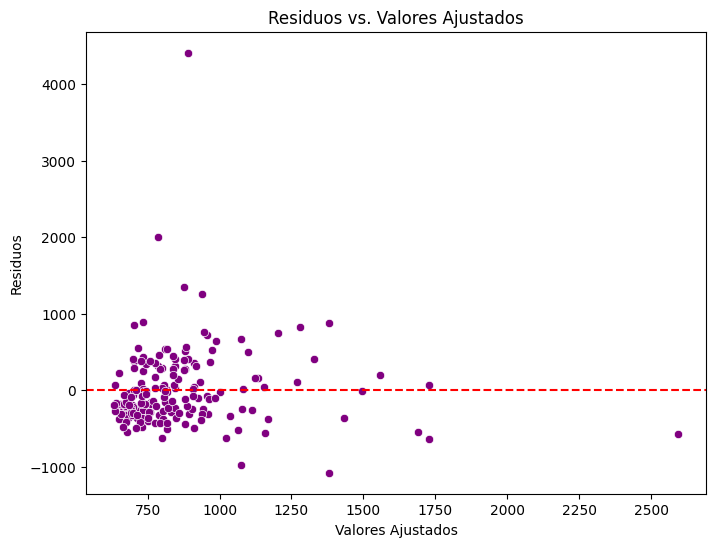

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=resultados.fittedvalues, y=residuos, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

Metodo forward

In [ ]:
def forward_selection(X, y):
    initial_features = X.columns.tolist()
    best_features = []
    while initial_features:
        scores_with_candidates = []
        for candidate in initial_features:
            features = best_features + [candidate]
            X_train = X[features]
            model = sm.OLS(y, X_train).fit()
            scores_with_candidates.append((model.rsquared, candidate))
        best_score, best_candidate = max(scores_with_candidates)
        initial_features.remove(best_candidate)
        best_features.append(best_candidate)
        print(f'Adding {best_candidate}, R-squared: {best_score}')
    return best_features

In [ ]:
selected_features_forward = forward_selection(X, y)
print("Selected features using forward selection:", selected_features_forward)

Adding age, R-squared: 0.6867329930579569
Adding sales, R-squared: 0.7283620015594647
Adding ceoten, R-squared: 0.7337339122741042
Adding college, R-squared: 0.7355497446679334
Adding const, R-squared: 0.17483469641683358
Selected features using forward selection: ['age', 'sales', 'ceoten', 'college', 'const']


In [ ]:
X_final = X[selected_features_forward]  # Solo las características restantes
final_model = sm.OLS(y, X_final).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     9.111
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           1.07e-06
Time:                        02:34:27   Log-Likelihood:                -1362.2
No. Observations:                 177   AIC:                             2734.
Df Residuals:                     172   BIC:                             2750.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.2084      5.262      0.040      0.9

In [ ]:
def forward_selection_adjusted(X, y):
    initial_features = X.columns.tolist()
    best_features = []
    n = len(y)
    while initial_features:
        scores_with_candidates = []
        for candidate in initial_features:
            features = best_features + [candidate]
            X_train = X[features]
            model = sm.OLS(y, X_train).fit()
            scores_with_candidates.append((model.rsquared_adj, candidate))  # Usar R² ajustado
        best_score, best_candidate = max(scores_with_candidates)
        initial_features.remove(best_candidate)
        best_features.append(best_candidate)
        print(f'Adding {best_candidate}, Adjusted R-squared: {best_score}')
    return best_features

In [ ]:
selected_features_forward = forward_selection_adjusted(X, y)
print("Selected features using forward selection with adjusted R-squared:", selected_features_forward)

Adding age, Adjusted R-squared: 0.6849530668821499
Adding sales, Adjusted R-squared: 0.7252575672915729
Adding ceoten, Adjusted R-squared: 0.7291431176581405
Adding college, Adjusted R-squared: 0.7294352878972499
Adding const, Adjusted R-squared: 0.15564480563582972
Selected features using forward selection with adjusted R-squared: ['age', 'sales', 'ceoten', 'college', 'const']


In [ ]:
X_final = X[selected_features_forward]  # Solo las características restantes
final_model = sm.OLS(y, X_final).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     9.111
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           1.07e-06
Time:                        02:34:12   Log-Likelihood:                -1362.2
No. Observations:                 177   AIC:                             2734.
Df Residuals:                     172   BIC:                             2750.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.2084      5.262      0.040      0.9

Metodo backward

In [ ]:
def backward_elimination(X, y):
    features = X.columns.tolist()
    while len(features) > 0:
        X_train = X[features]
        model = sm.OLS(y, X_train).fit()
        p_values = model.pvalues[1:]
        max_p_value = p_values.max()
        if max_p_value > 0.05:  # Umbral de significancia
            feature_with_max_p_value = p_values.idxmax()
            features.remove(feature_with_max_p_value)
            print(f'Removing {feature_with_max_p_value}, p-value: {max_p_value}')
        else:
            break
    return features

In [ ]:
selected_features_backward = backward_elimination(X, y)
print("Selected features using backward elimination:", selected_features_backward)

Removing age, p-value: 0.9684599428261984
Removing college, p-value: 0.5550441175300718
Selected features using backward elimination: ['const', 'ceoten', 'sales']


In [ ]:
X_final = X[selected_features_backward]  # Solo las características restantes
final_model = sm.OLS(y, X_final).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     18.22
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           6.54e-08
Time:                        02:33:57   Log-Likelihood:                -1362.4
No. Observations:                 177   AIC:                             2731.
Df Residuals:                     174   BIC:                             2740.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        621.6709     66.097      9.405      0.0

In [ ]:
def backward_selection_adjusted(X, y, significance_level=0.05):
    features = X.columns.tolist()
    while len(features) > 0:
        X_train = X[features]
        model = sm.OLS(y, X_train).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()
        feature_with_max_p_value = p_values.idxmax()
        if max_p_value > significance_level:
            features.remove(feature_with_max_p_value)
            print(f'Removing {feature_with_max_p_value}, p-value: {max_p_value}')
        else:
            break

    return features

In [ ]:
remaining_features_backward = backward_selection_adjusted(X, y)
print("Remaining features using backward selection with adjusted R-squared:", remaining_features_backward)

Removing age, p-value: 0.9684599428261984
Removing college, p-value: 0.5550441175300718
Remaining features using backward selection with adjusted R-squared: ['const', 'ceoten', 'sales']


In [ ]:
X_final = X[remaining_features_backward]  # Solo las características restantes
final_model = sm.OLS(y, X_final).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     18.22
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           6.54e-08
Time:                        02:33:27   Log-Likelihood:                -1362.4
No. Observations:                 177   AIC:                             2731.
Df Residuals:                     174   BIC:                             2740.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        621.6709     66.097      9.405      0.0

Ahora con Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
y = df['salary']
X = df.drop(columns=['salary'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)

In [ ]:
rf_train_mse = mean_squared_error(y_train, rf_train_predictions)
rf_train_mae = mean_absolute_error(y_train, rf_train_predictions)
rf_train_r2 = r2_score(y_train, rf_train_predictions)

rf_test_mse = mean_squared_error(y_test, rf_test_predictions)
rf_test_mae = mean_absolute_error(y_test, rf_test_predictions)
rf_test_r2 = r2_score(y_test, rf_test_predictions)

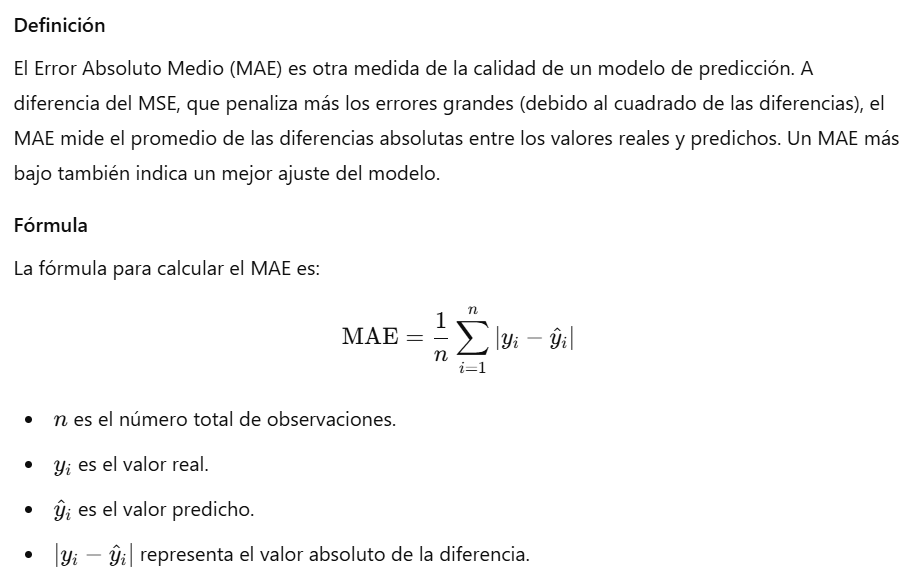

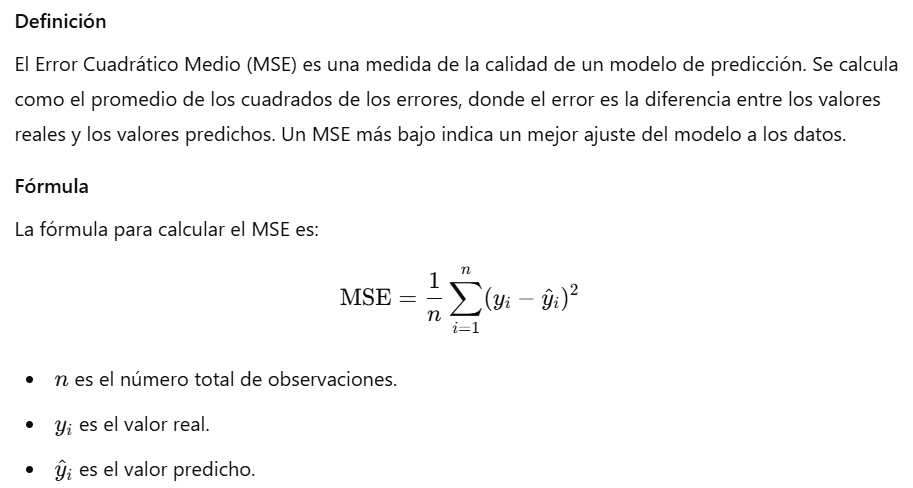

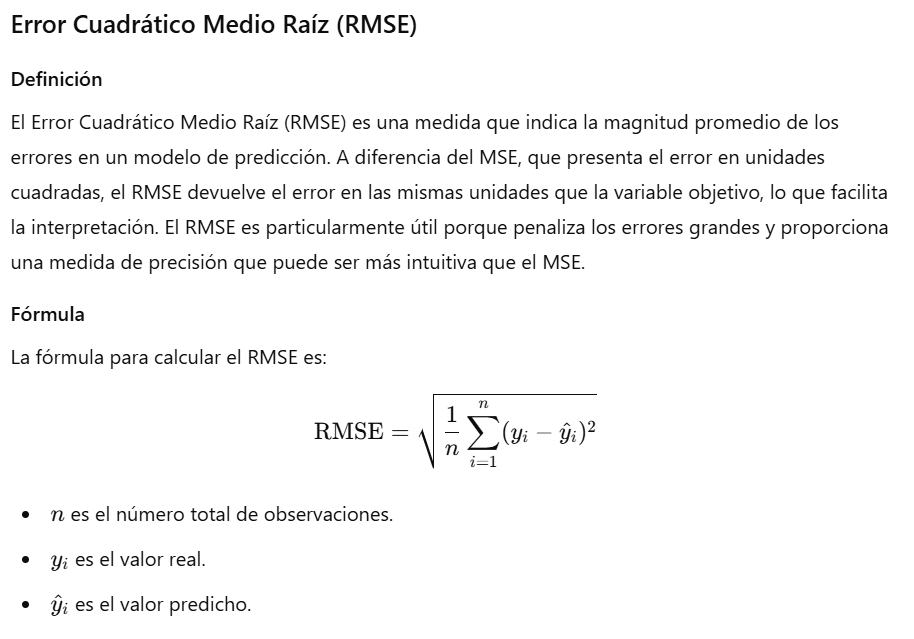

In [ ]:
print("Random Forest - Training Metrics:")
print("MSE:", rf_train_mse)
print("MAE:", rf_train_mae)
print("R²:", rf_train_r2)

print("\nRandom Forest - Testing Metrics:")
print("MSE:", rf_test_mse)
print("MAE:", rf_test_mae)
print("R²:", rf_test_r2)

Random Forest - Training Metrics:
MSE: 11522.859875609762
MAE: 19.94512195121952
R²: 0.9708463660875326

Random Forest - Testing Metrics:
MSE: 960.3207277777782
MAE: 18.927222222222227
R²: 0.9956456480177673


In [ ]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
xgb_train_predictions = xgb_model.predict(X_train)
xgb_test_predictions = xgb_model.predict(X_test)

In [ ]:
xgb_train_mse = mean_squared_error(y_train, xgb_train_predictions)
xgb_train_mae = mean_absolute_error(y_train, xgb_train_predictions)
xgb_train_r2 = r2_score(y_train, xgb_train_predictions)

xgb_test_mse = mean_squared_error(y_test, xgb_test_predictions)
xgb_test_mae = mean_absolute_error(y_test, xgb_test_predictions)
xgb_test_r2 = r2_score(y_test, xgb_test_predictions)

In [ ]:
print("\nXGBoost - Training Metrics:")
print("MSE:", xgb_train_mse)
print("MAE:", xgb_train_mae)
print("R²:", xgb_train_r2)

print("\nXGBoost - Testing Metrics:")
print("MSE:", xgb_test_mse)
print("MAE:", xgb_test_mae)
print("R²:", xgb_test_r2)


XGBoost - Training Metrics:
MSE: 2.240810194999222e-05
MAE: 0.0032393292682926828
R²: 1.0

XGBoost - Testing Metrics:
MSE: 1374.6463961805416
MAE: 24.387493274830007
R²: 0.9937669634819031


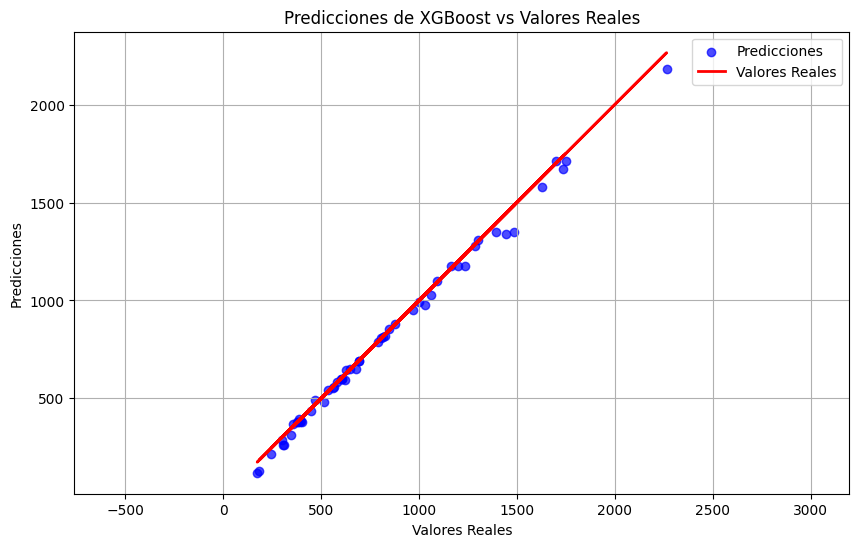

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_test_predictions, alpha=0.7, color='blue', label='Predicciones')
plt.plot(y_test, y_test, color='red', label='Valores Reales', linewidth=2)
plt.title('Predicciones de XGBoost vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()